In [222]:
import pandas as pd
import matplotlib.pyplot as plt

In [223]:
df = pd.read_csv("sample_data.csv")

In [224]:
df['y_hat_20_03'] = 20 + 0.3*df['Marketing']

In [225]:
print(df[['Marketing', 'Profit', 'y_hat_20_03']])

    Marketing  Profit  y_hat_20_03
0         472     192        161.6
1         444     192        153.2
2         408     191        142.4
3         383     183        134.9
4         366     166        129.8
5         363     157        128.9
6         128     156         58.4
7         324     156        117.2
8         312     152        113.6
9         305     150        111.5
10        229     146         88.7
11        250     144         95.0
12        250     142         95.0
13        253     134         95.9
14        257     133         97.1
15        262     130         98.6
16        264     127         99.2
17        283     125        104.9
18        295     124        108.5
19          0     123         20.0
20        299     118        109.7
21        300     111        110.0
22        303     110        110.9
23        305     109        111.5
24        141     109         62.3
25        138     107         61.4
26        134     106         60.2
27        353     10

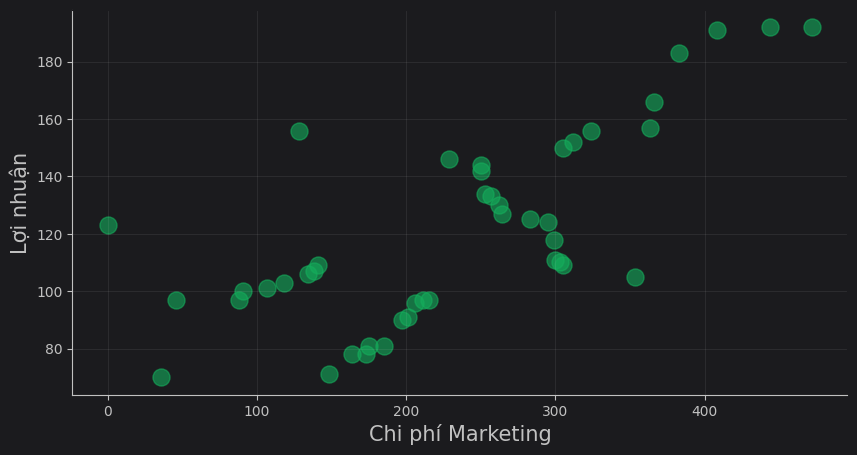

In [226]:
# Draw scatter plot
background_color = '#1B1B1E'
text_color = '#C1C1C1'

fig, ax = plt.subplots(
    figsize = (10, 5),
    facecolor =background_color  # Màu của bên trong chart
)  
ax.set_facecolor(background_color)     # Màu của trục x y

plt.scatter(
    x = df['Marketing'],    # Trục x
    y = df['Profit'],       # Trục y
    marker = 'o',           # Ký hiệu điểm
    color = '#14AE5C',      # Màu của các điểm
    alpha = 0.6,            # Điều chỉnh độ trong suốt (0 đến 1)
    s = 150                 # Kích cỡ điểm
)

# X axis
plt.xlabel("Chi phí Marketing", fontsize=15, c=text_color)
ax.spines['bottom'].set_color(text_color)
ax.spines['top'].set_color(background_color)       # Đổi màu để ẩn khung trên
ax.tick_params(axis='x', colors=text_color)

# Y axis
plt.ylabel("Lợi nhuận", fontsize=15, c=text_color)
ax.spines['left'].set_color(text_color)
ax.spines['right'].set_color(background_color)     # Đổi màu để ẩn cột bên phải
ax.tick_params(axis='y', colors=text_color)

# Grid
plt.grid(c=text_color, alpha=0.1)

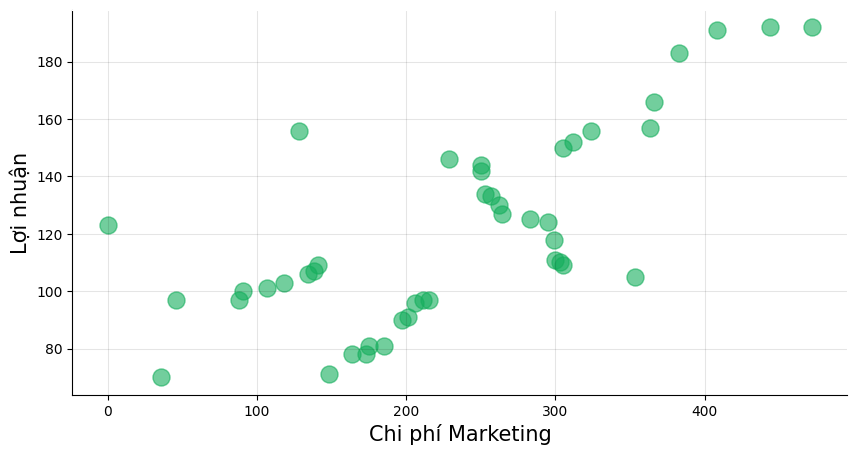

In [227]:
# Draw scatter plot
background_color = 'white'
text_color = 'black'

fig, ax = plt.subplots(
    figsize = (10, 5),
    facecolor =background_color  # Màu của bên trong chart
)  
ax.set_facecolor(background_color)     # Màu của trục x y

plt.scatter(
    x = df['Marketing'],    # Trục x
    y = df['Profit'],       # Trục y
    marker = 'o',           # Ký hiệu điểm
    color = '#14AE5C',      # Màu của các điểm
    alpha = 0.6,            # Điều chỉnh độ trong suốt (0 đến 1)
    s = 150                 # Kích cỡ điểm
)

# X axis
plt.xlabel("Chi phí Marketing", fontsize=15, c=text_color)
ax.spines['bottom'].set_color(text_color)
ax.spines['top'].set_color(background_color)       # Đổi màu để ẩn khung trên
ax.tick_params(axis='x', colors=text_color)

# Y axis
plt.ylabel("Lợi nhuận", fontsize=15, c=text_color)
ax.spines['left'].set_color(text_color)
ax.spines['right'].set_color(background_color)     # Đổi màu để ẩn cột bên phải
ax.tick_params(axis='y', colors=text_color)

# Grid
plt.grid(c=text_color, alpha=0.1)

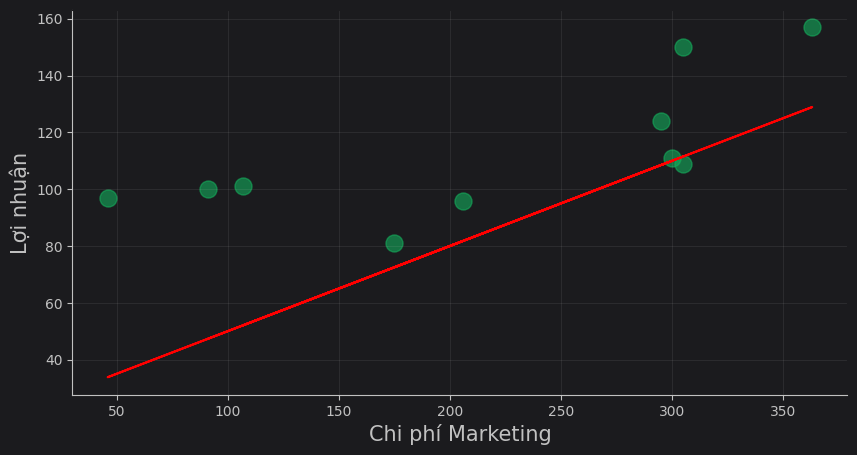

In [228]:
sample_df = df.sample(10)

# Draw scatter plot
background_color = '#1B1B1E'
text_color = '#C1C1C1'

fig, ax = plt.subplots(
    figsize = (10, 5),
    facecolor =background_color  # Màu của bên trong chart
)  
ax.set_facecolor(background_color)     # Màu của trục x y

plt.scatter(
    x = sample_df['Marketing'],    # Trục x
    y = sample_df['Profit'],       # Trục y
    marker = 'o',           # Ký hiệu điểm
    color = '#14AE5C',      # Màu của các điểm
    alpha = 0.6,            # Điều chỉnh độ trong suốt (0 đến 1)
    s = 150                 # Kích cỡ điểm
)

plt.plot(
    sample_df['Marketing'],
    sample_df['y_hat_20_03'],
    color = 'red'
)

# X axis
plt.xlabel("Chi phí Marketing", fontsize=15, c=text_color)
ax.spines['bottom'].set_color(text_color)
ax.spines['top'].set_color(background_color)       # Đổi màu để ẩn khung trên
ax.tick_params(axis='x', colors=text_color)

# Y axis
plt.ylabel("Lợi nhuận", fontsize=15, c=text_color)
ax.spines['left'].set_color(text_color)
ax.spines['right'].set_color(background_color)     # Đổi màu để ẩn cột bên phải
ax.tick_params(axis='y', colors=text_color)

# Grid
plt.grid(c=text_color, alpha=0.1)

In [229]:
def cost_function(marketing, profit, w0, w1):
    data_size = len(profit)
    total_error = 0
    for i in range(data_size):
        total_error += (profit[i] - (w0 + w1*marketing[i]))
    return total_error / data_size

In [230]:
def gradient_descent(marketing, profit, w0_input, w1_input, learning_rate):
    w0_gradient = 0
    w1_gradient = 0
    data_size = len(profit)

    # Tính tổng đạo hàm
    for i in range(data_size):
        # Đạo hàm w0
        w0_gradient += (w0_input + w1_input*marketing[i] - profit[i])

        # Đạo hàm w1
        w1_gradient += marketing[i]*(w0_input + w1_input*marketing[i] - profit[i])

    # Cập nhật giá trị tham số
    w0_new = w0_input - 2 * learning_rate * w0_gradient / data_size
    w1_new = w1_input - 2 * learning_rate * w1_gradient / data_size
    
    return w0_new, w1_new

In [241]:
def train(marketing, profit, w0, w1, learning_rate, loop_count):
    cost_records = []
    cost = cost_function(marketing, profit, w0, w1)
    print(f"loop=0    w0={w0:.4f}    w1={w1:.4f}    cost={cost:.4f}")


    for loop in range(1, loop_count+1):
        # Cập nhật tham số
        w0, w1 = gradient_descent(marketing, profit, w0, w1, learning_rate)

        # Tính chi phí (độ sai lệch)
        cost = cost_function(marketing, profit, w0, w1)
        cost_records.append(cost)

        if loop < 10:
            print(f"loop={loop}    w0={w0:.4f}    w1={w1:.4f}    cost={cost:.4f}")
            
        # In ra giá trị tại một số vòng lặp
        if loop % 10 == 0:
            print(f"loop={loop}    w0={w0:.4f}    w1={w1:.4f}    cost={cost:.4f}")

    return w0, w1, cost_records

In [242]:
marketing = df['Marketing'].values
profit = df['Profit'].values
w0 = 20
w1 = 5
learning_rate = 0.00001
loop_count=100
train(marketing, profit, w0, w1, learning_rate, loop_count)

loop=0    w0=20.0000    w1=5.0000    cost=-1056.0000
loop=1    w0=19.9789    w1=-1.0039    cost=333.3671
loop=2    w0=19.9855    w1=0.8247    cost=-89.7723
loop=3    w0=19.9838    w1=0.2678    cost=39.0971
loop=4    w0=19.9845    w1=0.4374    cost=-0.1509
loop=5    w0=19.9845    w1=0.3857    cost=11.8023
loop=6    w0=19.9848    w1=0.4014    cost=8.1618
loop=7    w0=19.9849    w1=0.3967    cost=9.2705
loop=8    w0=19.9851    w1=0.3981    cost=8.9328
loop=9    w0=19.9853    w1=0.3977    cost=9.0356
loop=10    w0=19.9855    w1=0.3978    cost=9.0043
loop=20    w0=19.9873    w1=0.3978    cost=9.0113
loop=30    w0=19.9891    w1=0.3978    cost=9.0109
loop=40    w0=19.9909    w1=0.3978    cost=9.0106
loop=50    w0=19.9927    w1=0.3977    cost=9.0103
loop=60    w0=19.9945    w1=0.3977    cost=9.0100
loop=70    w0=19.9963    w1=0.3977    cost=9.0096
loop=80    w0=19.9981    w1=0.3977    cost=9.0093
loop=90    w0=19.9999    w1=0.3977    cost=9.0090
loop=100    w0=20.0017    w1=0.3977    cost=9.00

(20.001693031985344,
 0.39771593583274484,
 [333.36711638429745,
  -89.77233724578025,
  39.097073016816054,
  -0.15085811775988714,
  11.802273497368628,
  8.161839303763621,
  9.270511507227946,
  8.932817187200408,
  9.035621762397163,
  9.004269971791812,
  9.013776241823981,
  9.010838964487341,
  9.01169143822395,
  9.011389722538116,
  9.011439521751841,
  9.011382265316543,
  9.011357613419811,
  9.011323031781867,
  9.011291474452019,
  9.011258996203166,
  9.011226798575972,
  9.01119451563459,
  9.011162258826815,
  9.011129994210584,
  9.011097732123169,
  9.011065469416268,
  9.01103320704873,
  9.011000944728519,
  9.010968682544588,
  9.010936420469825,
  9.010904158512522,
  9.010871896670116,
  9.010839634943418,
  9.010807373332158,
  9.010775111836429,
  9.010742850456188,
  9.010710589191465,
  9.010678328042246,
  9.010646067008535,
  9.010613806090321,
  9.010581545287625,
  9.01054928460041,
  9.010517024028715,
  9.010484763572517,
  9.010452503231836,
  9.01042